<a href="https://colab.research.google.com/github/chetanre7/Google-Play-Store-app-review/blob/main/Play_Store_App_Review_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

## <b> Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.</b>

## <b> Explore and analyze the data to discover key factors responsible for app engagement and success. </b>

In [156]:
# Importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [145]:
# Mounting Google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [146]:
#loading the file of play store data
google_play_df=pd.read_csv('/content/drive/MyDrive/Play Store Data.csv')

In [147]:
google_play_df.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [148]:
#loading the file of user reviews on google play store app
user_reviews_df=pd.read_csv('/content/drive/MyDrive/User Reviews.csv')

In [149]:
user_reviews_df.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [150]:
google_play_df.columns   # name of each column in play store file

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [151]:
user_reviews_df.columns   # name of each column in user reviews file

Index(['App', 'Translated_Review', 'Sentiment', 'Sentiment_Polarity',
       'Sentiment_Subjectivity'],
      dtype='object')

In [152]:
google_play_df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


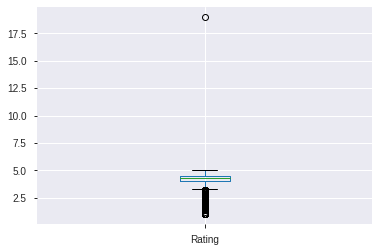

In [159]:
google_play_df.boxplot();

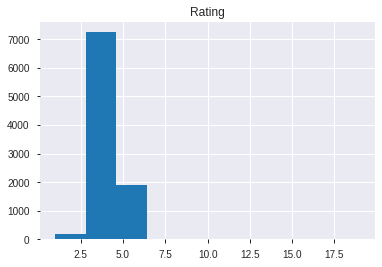

In [161]:
google_play_df.hist();

As per the Boxplot and Histogram we see that there is an outlier so we have to remove that outlier

###Data Cleaning

In [163]:
google_play_df.info()         #info gives us details about column and Non Null cell and remaining Null cell

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [164]:
google_play_df.isnull().sum()     # This will gives us total null values present in each column

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

### Checking the outliers

In [165]:
google_play_df[df.Rating > 5]                     

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [166]:
google_play_df.drop([10472], inplace= True)   # drop will remove the romove the row which contain outlier

In [167]:
google_play_df[10471:10474]    

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10471,Xposed Wi-Fi-Pwd,PERSONALIZATION,3.5,1042,404k,"100,000+",Free,0,Everyone,Personalization,"August 5, 2014",3.0.0,4.0.3 and up
10473,osmino Wi-Fi: free WiFi,TOOLS,4.2,134203,4.1M,"10,000,000+",Free,0,Everyone,Tools,"August 7, 2018",6.06.14,4.4 and up
10474,Sat-Fi Voice,COMMUNICATION,3.4,37,14M,"1,000+",Free,0,Everyone,Communication,"November 21, 2014",2.2.1.5,2.2 and up


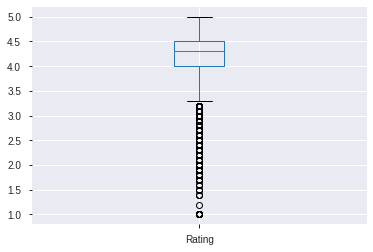

In [168]:
google_play_df.boxplot();  

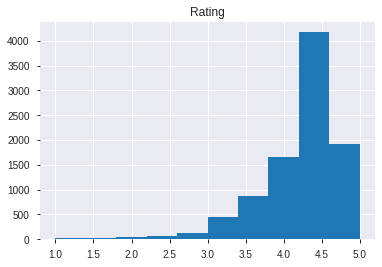

In [170]:
google_play_df.hist();

###Data Manipulation

In [174]:
def data_median(new):
  return new.fillna(new.median)

In [176]:
google_play_df.Rating = google_play_df['Rating'].transform(data_median)  #This will remove the replace value from rating

In [177]:
google_play_df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              1
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       8
Android Ver       2
dtype: int64

Now i have null values in column Type, Current Ver and Android Ver.

I am going to replace null values of above 3 columns with mode of that perticular column.

In [185]:
print(google_play_df['Type'].mode())    
print(google_play_df['Current Ver'].mode())   
print(google_play_df['Android Ver'].mode())   

0    Free
dtype: object
0    Varies with device
dtype: object
0    4.1 and up
dtype: object


In [189]:
google_play_df['Type'].fillna(str(google_play_df['Type'].mode().values[0]),inplace=True)
google_play_df['Current Ver'].fillna(str(google_play_df['Current Ver'].mode().values[0]),inplace=True)
google_play_df['Android Ver'].fillna(str(google_play_df['Android Ver'].mode().values[0]),inplace=True)

In [190]:
google_play_df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In this way we removed all the null values that are present in the data

In [198]:
google_play_df['Price']=google_play_df['Price'].apply((lambda x:str(x).replace('$','') if '$' in str(x) else str(x)))
google_play_df['Price']=google_play_df['Price'].apply(lambda x: float(x))
google_play_df['Reviews']=pd.to_numeric(google_play_df['Reviews'], errors='coerce')

In [203]:
google_play_df['Installs']= google_play_df['Installs'].apply(lambda x: str(x).replace('+','') if '+' in str(x) else str (x))
google_play_df['Installs']= google_play_df['Installs'].apply(lambda x: str(x).replace(',','') if ',' in str(x) else str (x))
google_play_df['Installs']=google_play_df['Installs'].apply(lambda x: float(x))

In [206]:
google_play_df.head(7)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000.0,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000.0,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000.0,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000.0,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,50000.0,Free,0.0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19M,50000.0,Free,0.0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up


In [205]:
google_play_df.describe()

,Reviews,Installs,Price
count,1.084000e+04,1.084000e+04,10840.000000
mean,4.441529e+05,1.546434e+07,1.027368
std,2.927761e+06,8.502936e+07,15.949703
min,0.000000e+00,0.000000e+00,0.000000
25%,3.800000e+01,1.000000e+03,0.000000
50%,2.094000e+03,1.000000e+05,0.000000
75%,5.477550e+04,5.000000e+06,0.000000
max,7.815831e+07,1.000000e+09,400.000000


Now we got clean data, we remove null values we replace special characters of the data. Now it will be easy to analyze the data